<img src="images/GEMS long.png" width=600 alt="GEMS Logo" title="GEMS" />

# **Geocomputation with Vector Data**

**Instructors:**  
Ali Joglekar, University of Minnesota (joglekar@umn.edu)  
Yuan Chai, University of Minnesota (chaix026@umn.edu)  

---

## Method of Delivery
- Workshop text, images and R code are all contained within a Jupyter Notebook hosted on the GEMS Informatics Platform. You do not need to have R or RStudio installed on your machine to participate
- All needed data and scripts are in the following github repo: [https://github.com/y-chai/GEMS-Learning-R-Geospatial-Intro](https://github.com/y-chai/GEMS-Learning-R-Geospatial-Vector)
- A recording of the workshop will be posted on Canvas
- Please download any desired materials, as we cannot guarantee access to the Canvas course beyond 3 months.  

## Module Outline
- [Geocomputation Intro](#Geocomp)  
- [Vector Data Review](#Vector)  
- [Attribute Data Operations](#Attribute)  
  - [Exercise 1](#Ex1)
- [Spatial Data Operations](#Spatial) 
  - [Exercise 2](#Ex2)
- [Geometry Operations](#Geometry)  
  - [Exercise 3](#Ex3)

## Setup

### Fetch Script & Data
1. Login to GEMS Platform at [https://gems.agroinformatics.org/](https://gems.agroinformatics.org/)
   GEMS Platform uses Globus to authenticate your account, so if your institution is already linked to Globus (for example, University of Minnesota and many other universities), you can search and select your institution from the list and use your institutional account to log into GEMS Platform. Alternatively, you can log in using Google or ORCID iD, or create your own Globus account to log in.
   
2. Once logged in, click `Analyze > JupyterLab` from the homepage

3. Open a bash terminal by clicking ‘Terminal’ icon in the Launcher OR by clicking `File > New > Terminal` 

4. In bash terminal, create directories for this workshop

    ```bash
    mkdir classes   #if you don't already have this directory created
    cd classes  
    mkdir GEMSX003  #if you don't already have this directory created
    cd GEMSX003
    ```


5. Clone repository for this class

    ```bash
    git clone https://github.com/y-chai/GEMS-Learning-R-Geospatial-Vector.git
    ```
  
  
### Load R Libraries

In [1]:
# Install and load packages needed for this workshop (

packages_to_load <- c("rio", "sf", "spData", "tmap")

for ( package in packages_to_load ) {
    # Check if package is already installed, if not, install and load the package
    if (!require(package, character.only=T, quietly=T, warn.conflicts=F)) {
        install.packages(package)
        suppressPackageStartupMessages(library(package, character.only=T, quietly=T, warn.conflicts=F))
    }
}

Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`



<details>
    
<summary><span style='color:Green'> Note: For your own work, once packages are installed, it is recommended to just use library() to load your packages  </span></summary>


```r
# General dataframe libraries
library(rio)

# Spatial data libraries
library(sf)
library(spData)

# Plotting libraries
library(tmap)
```
          
</details>


### Data

Your expercises will draw on three vector datasets from the Minnesota Geospatial Commons, which have been downloaded, cleaned, transformed and saved in the directory `./data/MN` for this workshop.
1. \[POINT\] Minnesota Six-Inch Soil Temperature: https://gisdata.mn.gov/dataset/geos-soil-temp-network
2. \[LINES\] Stream Routes - Major River Centerlines: https://gisdata.mn.gov/dataset/water-major-river-centerlines
3. \[POLYGONS\] Groundwater Provinces of Minnesota 2021: https://gisdata.mn.gov/dataset/geos-groundwater-provinces-mn


### Attribution

The following material draws heavily from Robin Lovelace's [Geocomputation with R](https://geocompr.robinlovelace.net/index.html) textbook.

---

<a id="Geocomp"></a>
## **What is Geocomputation?**

*Geocomputation* is a young term, dating back to the first conference on the subject in 1996, simply defined as the process of 
"applying computing technology to geographical problems" (Rees and Turton 1998)

- Emphasis on "creative and experimental” applications" (Longley et al. 1998) 
- Using various different types of geodata and developing relevant geo-tools within the overall context of a ‘scientific’ approach (Openshaw and Abrahart 2000)

<a id="Vector"></a>
## **Vector Data Review**

Representation of the world using points, lines, and polygons

- Point: a precise location in space (e.g., weather stations)
- Line: a sequential collection of connected points (e.g., roads)
- Polygon: a region enclosed by lines (e.g., countries)

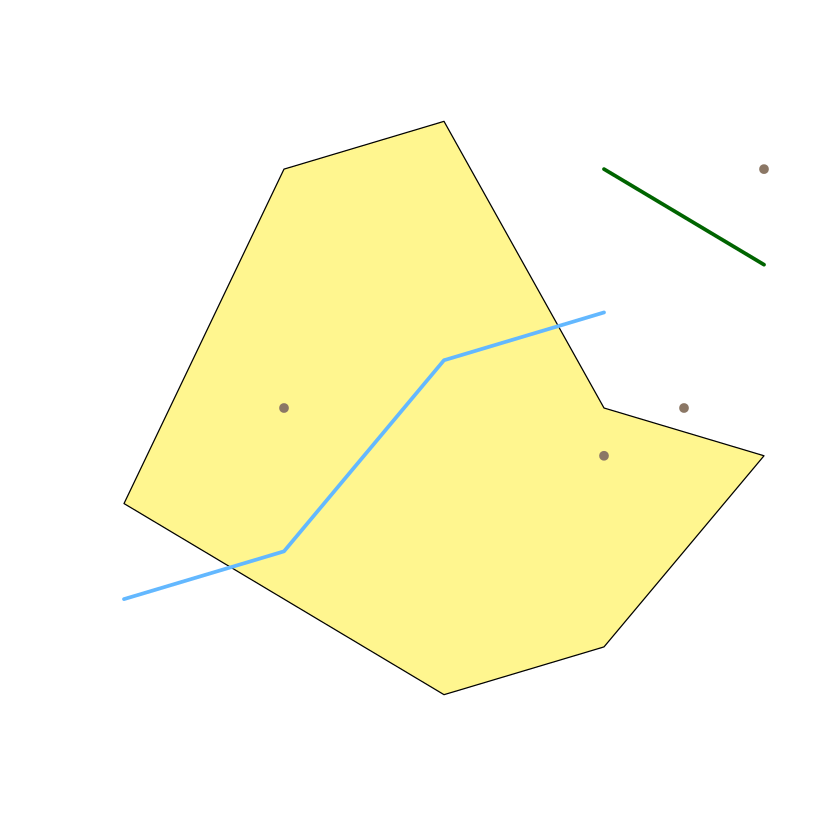

In [2]:
px <- c(5, 7, 8, 9, 8, 7, 6) 
py <- c(7, 3, 4, 8, 9, 15, 14) 
plot(px, py, type="n", axes=F, xlab = '', ylab = '') 
polygon(px, py, col = "khaki1")
points(c(6, 9, 8, 8.5), c(9, 14, 8, 9), pch=20, col = "peachpuff4", lwd = 3)
lines(c(5, 6, 7, 8), c(5, 6,10, 11), col = "steelblue1",  lwd = 3)
lines(c(8, 9), c(14, 12), col = "dark green", lwd = 3)

Vector data in R well supported by `sf` class, which extends `data.frame`

- `sf` objects represents points, lines and polygons as discrete entities in space

- `sf` objects have one column per attribute variable and one row per observation, or feature 

- `sf` objects have special column that contains geometry data 

- `sf` geometry column is a list column -- can contain multiple geographic entities per row

- `sf` enables full power of R’s data analysis capabilities to be unleashed on geographic data

<a id="Attribute"></a>
## **Attribute Data Operations**

Manipulating geographic objects based on attributes 

- subset
- aggregation
- merge

### Vector attribute manipulation: subset

Base R subsetting functions include `[` and `subset()`, both of which can be used with `sf` objects

The following code chunk creates a new object containing nations whose surface area is greater than 
1 million km2 and smaller than 5 million km2:

In [3]:
mid_countries = world[world$area_km2 > 1000000 & world$area_km2 < 5000000, ]

And then maps the two objects together using `tmap`

Warning message:
“Number of levels of the variable "iso_a2" is 175, which is larger than max.categories (which is 30), so levels are combined. Set tmap_options(max.categories = 175) in the layer function to show all levels.”


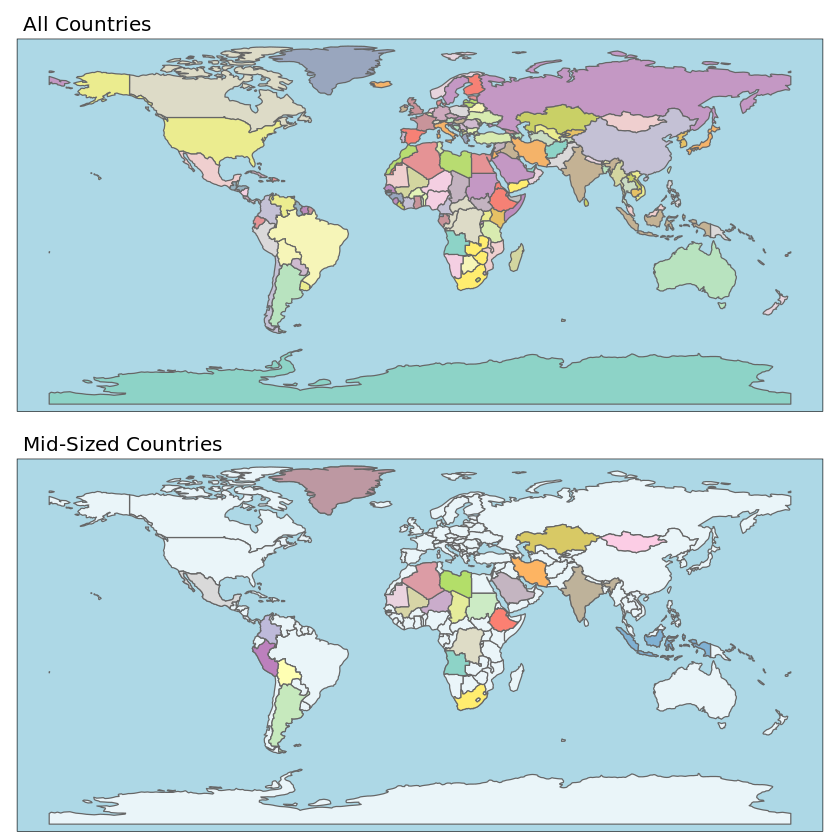

In [4]:
p_cntr1 = tm_shape(world) + tm_polygons(col = "iso_a2", legend.show = FALSE) +
  tm_layout(main.title = "All Countries", main.title.size = 1,
            bg.color = "lightblue")
p_cntr2 = tm_shape(world) + tm_polygons(col = "white", alpha = 0.75) +
  tm_shape(mid_countries) + tm_polygons(col = "iso_a2", legend.show = FALSE) +
  tm_layout(main.title = "Mid-Sized Countries", main.title.size = 1,
            bg.color = "lightblue")
tmap_arrange(p_cntr1, p_cntr2, ncol = 1)

### Vector attribute manipulation: aggregation

Aggregation operations summarize datasets by a ‘grouping variable’, typically an attribute column

The following code chunk calculates the number of people per continent based on country-level data (one row per country):

In [5]:
world_agg = aggregate(world["pop"], by = list(world$continent),
                       FUN = sum, na.rm = TRUE)

Warning message:
“The shape world_agg is invalid. See sf::st_is_valid”


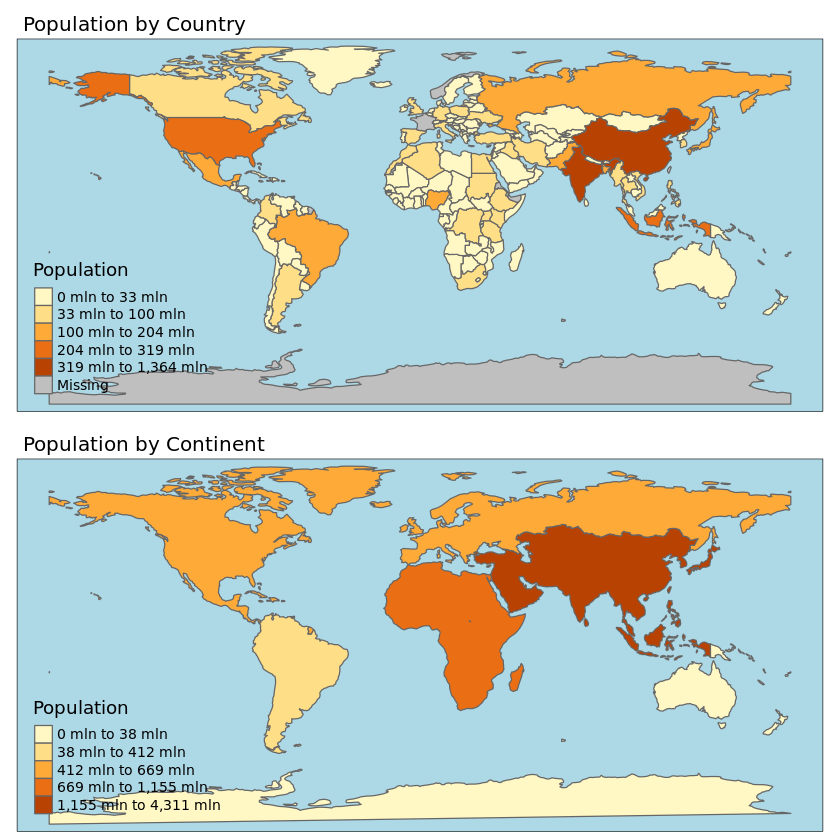

In [6]:
p_pop1 = tm_shape(world) + 
  tm_polygons(col = "pop", title = "Population", style = "jenks") +
  tm_layout(main.title = "Population by Country", main.title.size = 1,
            bg.color = "lightblue")
p_pop2 = tm_shape(world_agg) + 
  tm_polygons(col = "pop", title = "Population", style = "jenks") +
  tm_layout(main.title = "Population by Continent", main.title.size = 1,
            bg.color = "lightblue") + 
  tmap_options(check.and.fix = TRUE)
tmap_arrange(p_pop1, p_pop2, ncol = 1)

### Vector attribute manipulation: merge

Merge, or join, operations combine data from different sources based on a shared ‘key’ variable

The following code chunk takes an `sf` object (`world`) as the first 
argument and adds columns to it from a separate `data.frame` (`coffee_data`) specified as the second argument):

In [7]:
head(world)

head(coffee_data)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geom
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.97,885806,69.96000,8222.254,MULTIPOLYGON (((-180 -16.55...
TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.79,52234869,64.16300,2402.099,MULTIPOLYGON (((33.90371 -0...
EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.60,NA,NA,NA,MULTIPOLYGON (((-8.66559 27...
CA,Canada,North America,Americas,Northern America,Sovereign country,10036042.98,35535348,81.95305,43079.143,MULTIPOLYGON (((-132.71 54....
US,United States,North America,Americas,Northern America,Country,9510743.74,318622525,78.84146,51921.985,MULTIPOLYGON (((-171.7317 6...
KZ,Kazakhstan,Asia,Asia,Central Asia,Sovereign country,2729810.51,17288285,71.62000,23587.338,MULTIPOLYGON (((87.35997 49...


name_long,coffee_production_2016,coffee_production_2017
<chr>,<int>,<int>
Angola,NA,NA
Bolivia,3,4
Brazil,3277,2786
Burundi,37,38
Cameroon,8,6
Central African Republic,NA,NA


In [8]:
world_coffee = merge(world, coffee_data, by = "name_long")

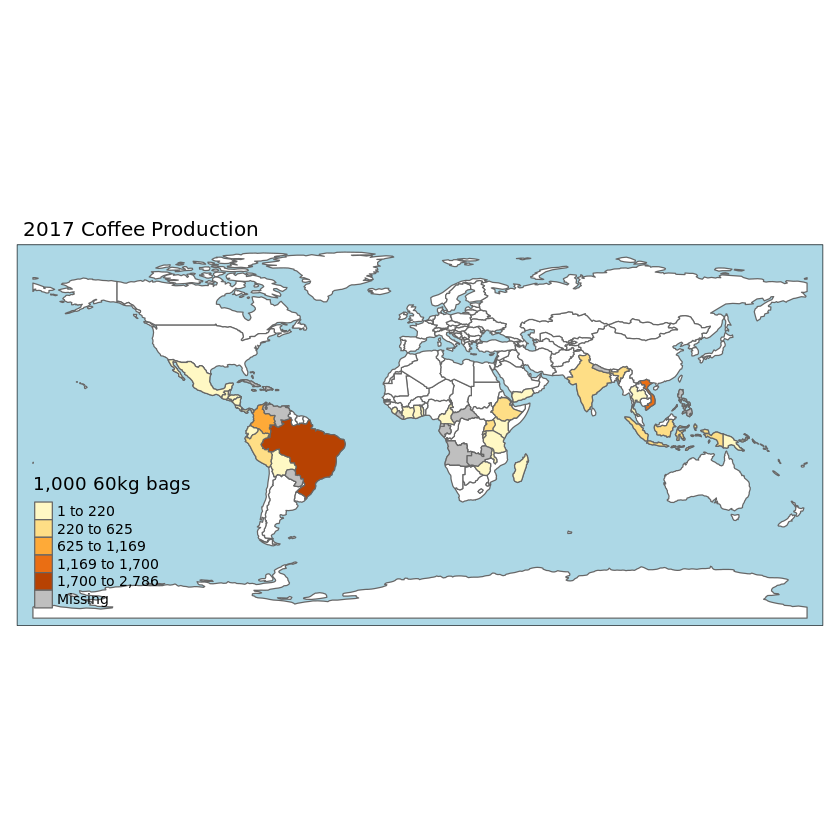

In [9]:
tm_shape(world) + tm_polygons(col = "white") +
  tm_shape(world_coffee) + 
  tm_polygons(col = "coffee_production_2017", title = "1,000 60kg bags", style = "jenks") +
  tm_layout(main.title = "2017 Coffee Production", main.title.size = 1,
            bg.color = "lightblue")

In the majority of cases where variable names are not the same, you have two options:

1. Rename key variables in one of the objects so they match
2. Use the `by` argument to specify the joining variables

```r
sf2 <- merge(sf1, dat1, by = "var")
sf2 <- merge(sf1, dat1, by.x = "var1", by.y = "var2")
```

Types of merges 

- Inner join preserves matching features from both datasets

```r
sf2 <- merge(sf1, dat1, by.x = "var1", by.y = "var2", all = F)
```

- Left (outer) join preserves features from the first dataset

```r
sf2 <- merge(sf1, dat1, by.x = "var1", by.y = "var2", all.x = T)
```

- Right (outer) join preserves features from the second dataset

```r
sf2 <- merge(sf1, dat1, by.x = "var1", by.y = "var2", all.y = T)
```

- Outer join preserves all features from both datasets

```r
sf2 <- merge(sf1, dat1, by.x = "var1", by.y = "var2", all = T)
```

<a id="Ex1"></a>
### **<span style='color:Green'> Exercise 1: Attribute Data Operations</span>**   

Data Source(s): 
- Groundwater Provinces shapefile found at `.data/gw_prov/gw_provinces_extra.shp`

1. Find and plot all groundwater provinces in Minnesota that have var1 equal to "a" and var3 greater than 100. 

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#read-in shapefile
library(sf)
gw_prov <- st_read("./data/MN/gw_prov")
summary(gw_prov)
plot(st_geometry(gw_prov))

#subset shapefile using either `[` or `subset()`
a100_prov1 <- gw_prov[gw_prov$var1 == "a" & gw_prov$var3 > 100, ] #with []
a100_prov2 <- subset(gw_prov, var1 == "a" & var3 > 100)           #with subset()

#plot to verify
library(tmap)
p1 <- tm_shape(gw_prov) +
  tm_polygons("var1")

p2 <- tm_shape(gw_prov) +
  tm_polygons("var3")

p3 <- tm_shape(gw_prov) +
  tm_borders() + 
  tm_shape(a100_prov1) +
  tm_polygons("var3")

tmap_arrange(p1, p2, p3, nrow = 1)
```
----
          
</details>

2. Run the following code: 

```r
gw_prov_df <- data.frame(provID = as.character(c(seq(1:5),7)), 
                         var4 = sample(c("yes","no"), size = 6, replace = TRUE), 
                         var5 = runif(n = 6, min = 10, max = 50))
```

Add variables from `gw_prov_df` to `gw_prov`, and create a new object called `gw_prov_stats`. 
What function did you use and why? Which variable is key in both datasets? How many observations
are in your new object?

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#inner join
gw_prov_statsI <- merge(gw_prov, gw_prov_df, by.x = "PROVINCE", by.y = "provID", all = F)
dim(gw_prov_statsI)[1]
tm_shape(gw_prov) +
  tm_borders() + 
  tm_shape(gw_prov_statsI) +
  tm_polygons("var4")

#left outer join
gw_prov_statsL <- merge(gw_prov, gw_prov_df, by.x = "PROVINCE", by.y = "provID", all.x = T)
dim(gw_prov_statsL)[1]
tm_shape(gw_prov) +
  tm_borders() + 
  tm_shape(gw_prov_statsL) +
  tm_polygons("var4")

#right outer join (causes empty geometry)
gw_prov_statsR <- merge(gw_prov, gw_prov_df, by.x = "PROVINCE", by.y = "provID", all.y = T)
dim(gw_prov_statsR)[1]
tm_shape(gw_prov) +
  tm_borders() + 
  tm_shape(gw_prov_statsR) +
  tm_polygons("var4")

#outer join (causes empty geometry)
gw_prov_statsO <- merge(gw_prov, gw_prov_df, by.x = "PROVINCE", by.y = "provID", all = T)
dim(gw_prov_statsO)[1]
tm_shape(gw_prov) +
  tm_borders() + 
  tm_shape(gw_prov_statsO) +
  tm_polygons("var4")
```
----
          
</details>

3. What is the aggregate var3 by var1? 

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#sum var3 by var1
gw_prov_agg = aggregate(gw_prov["var3"], by = list(gw_prov$var1), FUN = sum, na.rm = TRUE)

#plot to verify
p1 <- tm_shape(gw_prov) +
  tm_polygons("var3")

p2 <- tm_shape(gw_prov_agg) +
  tm_polygons("var3")

tmap_arrange(p1, p2, nrow = 1)
```
----
          
</details>

<a id="Spatial"></a>
## **Spatial Data Operations**

Modifying geographic objects based on their location and shape

- spatial subset
- topological relations
- spatial joining
- spatial data aggregation


### Vector spatial data operations: subset

Select features of a spatial object based on whether or not they in some way relate in space to another object

The following code chunk first creates an object representing Canterbury, then uses spatial subsetting to return all high points in the region:

In [10]:
canterbury = nz[nz$Name == "Canterbury",]
canterbury_height = nz_height[canterbury, ]

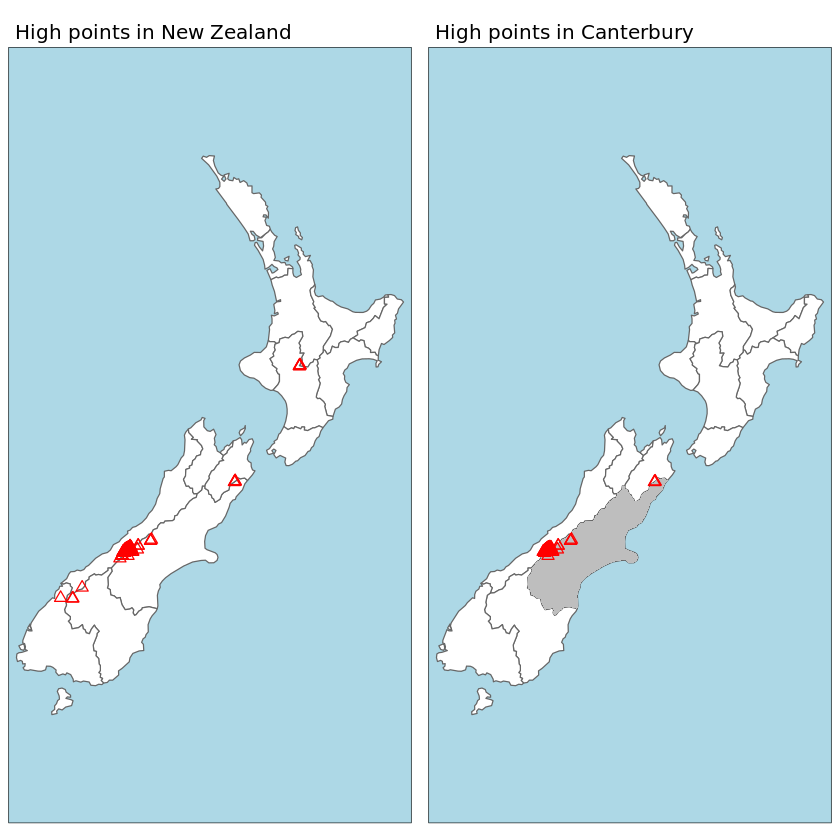

In [11]:
p_hpnz1 = tm_shape(nz) + tm_polygons(col = "white") +
  tm_shape(nz_height) + tm_symbols(shape = 2, col = "red", size = 0.25) +
  tm_layout(main.title = "High points in New Zealand", main.title.size = 1,
            bg.color = "lightblue")
p_hpnz2 = tm_shape(nz) + tm_polygons(col = "white") +
  tm_shape(canterbury) + tm_fill(col = "gray") + 
  tm_shape(canterbury_height) + tm_symbols(shape = 2, col = "red", size = 0.25) +
  tm_layout(main.title = "High points in Canterbury", main.title.size = 1,
            bg.color = "lightblue")
tmap_arrange(p_hpnz1, p_hpnz2, ncol = 2)

### Vector spatial data operations: topology

Topological relations describe the spatial relationships between objects

<img src="images/topological_rel.png" width=600 alt="Topological" title="Topological Relationships" />

Consider the following figure which contains a polygon (`a`) and some points (`p`).

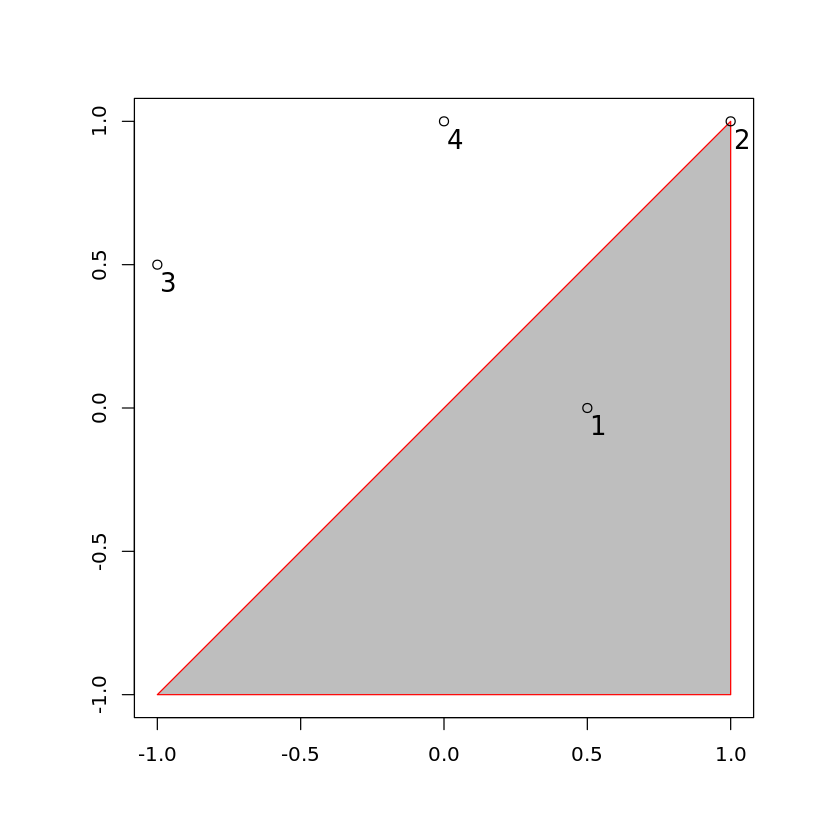

In [12]:
# create a polygon
a_poly <- st_polygon(list(rbind(c(-1, -1), c(1, -1), c(1, 1), c(-1, -1))))
a <- st_sfc(a_poly)
# create points
p_matrix <- matrix(c(0.5, 1, -1, 0, 0, 1, 0.5, 1), ncol = 2)
p_multi <- st_multipoint(x = p_matrix)
p <- st_cast(st_sfc(p_multi), "POINT")

par(pty = "s")
plot(a, border = "red", col = "gray", axes = TRUE)
plot(p, add = TRUE, lab = 1:4, pch = 1)
text(p_matrix[, 1] + 0.04, p_matrix[, 2] - 0.06, 1:4, cex = 1.3)

Which of the points in `p` **intersect** in some way with polygon `a`?

In [13]:
sel <- st_intersects(p, a, sparse = F)
sel[,1]

[1]  TRUE  TRUE FALSE FALSE

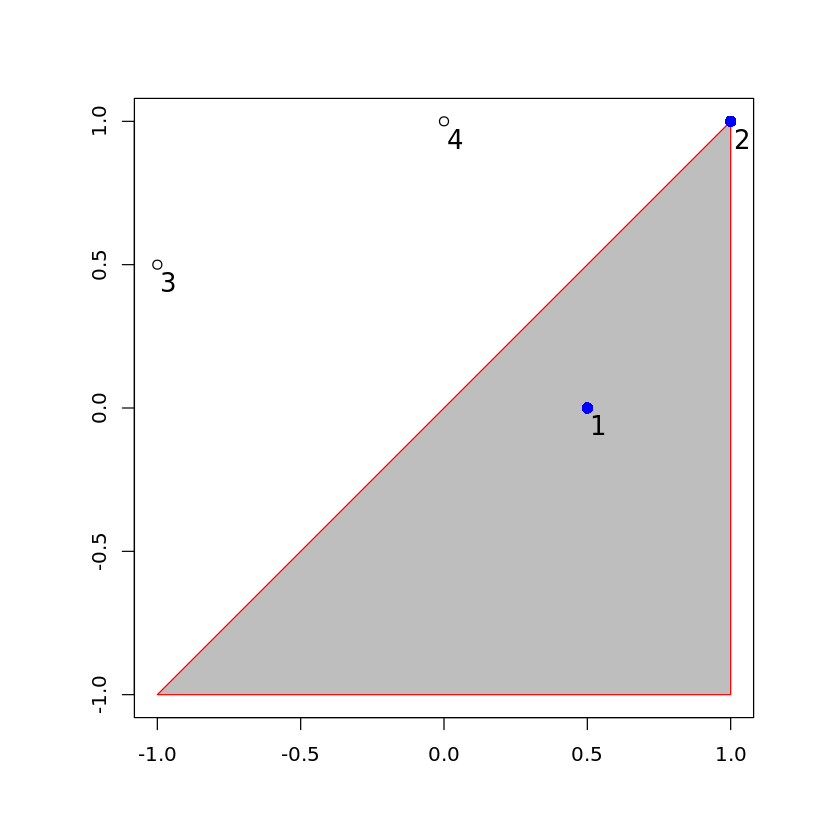

In [14]:
par(pty = "s")
plot(a, border = "red", col = "gray", axes = TRUE)
plot(p[-sel[,1]], add = TRUE, lab = 1:4, pch = 1)
plot(p[sel[,1]], add = TRUE, pch = 16, col = "blue", bg = "blue", cex = 1.3)
text(p_matrix[, 1] + 0.04, p_matrix[, 2] - 0.06, 1:4, cex = 1.3)

Which of the points in `p` are **disjointed** from polygon `a`?

In [15]:
sel <- st_disjoint(p, a, sparse = F)
sel[,1]

[1] FALSE FALSE  TRUE  TRUE

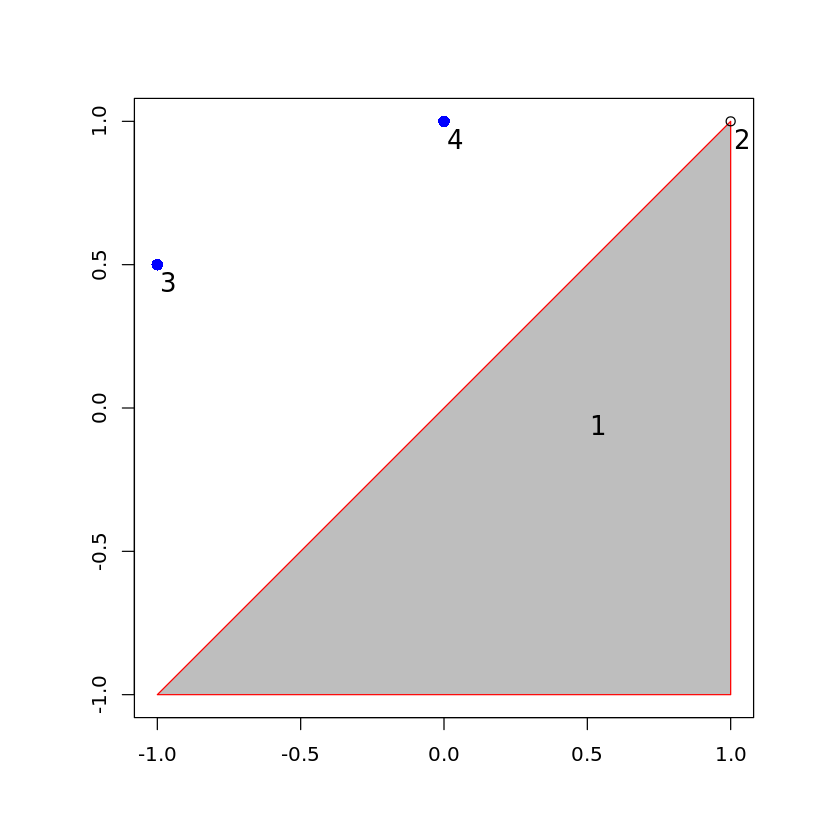

In [16]:
par(pty = "s")
plot(a, border = "red", col = "gray", axes = TRUE)
plot(p[-sel[,1]], add = TRUE, lab = 1:4, pch = 1)
plot(p[sel[,1]], add = TRUE, pch = 16, col = "blue", bg = "blue", cex = 1.3)
text(p_matrix[, 1] + 0.04, p_matrix[, 2] - 0.06, 1:4, cex = 1.3)

Which of the points in `p` are completely **within** polygon `a`?

In [17]:
sel <- st_within(p, a, sparse = F)
sel[,1]

[1]  TRUE FALSE FALSE FALSE

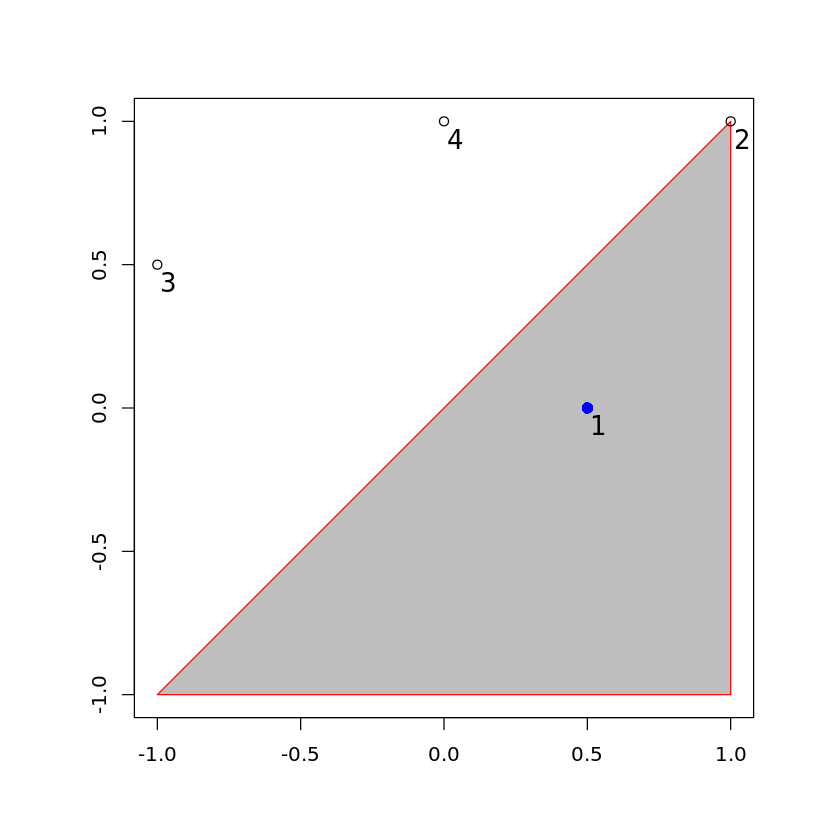

In [18]:
par(pty = "s")
plot(a, border = "red", col = "gray", axes = TRUE)
plot(p[-sel[,1]], add = TRUE, lab = 1:4, pch = 1)
plot(p[sel[,1]], add = TRUE, pch = 16, col = "blue", bg = "blue", cex = 1.3)
text(p_matrix[, 1] + 0.04, p_matrix[, 2] - 0.06, 1:4, cex = 1.3)

Which of the points in `p` **touch** (the border of) polygon `a`?

In [19]:
sel <- st_touches(p, a, sparse = F)
sel[,1]

[1] FALSE  TRUE FALSE FALSE

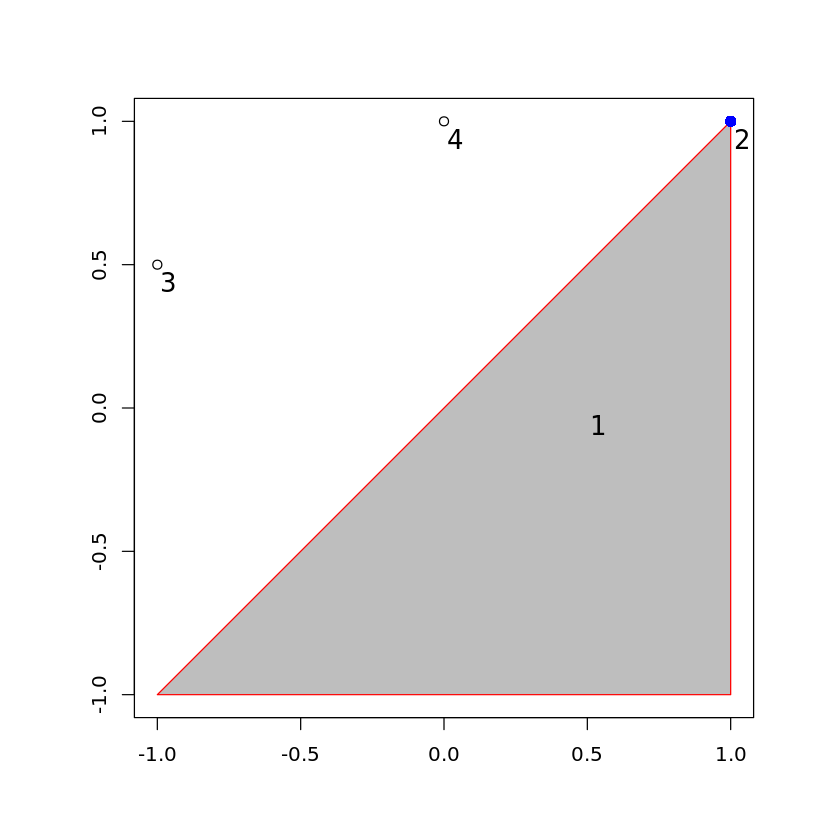

In [20]:
par(pty = "s")
plot(a, border = "red", col = "gray", axes = TRUE)
plot(p[-sel[,1]], add = TRUE, lab = 1:4, pch = 1)
plot(p[sel[,1]], add = TRUE, pch = 16, col = "blue", bg = "blue", cex = 1.3)
text(p_matrix[, 1] + 0.04, p_matrix[, 2] - 0.06, 1:4, cex = 1.3)

Which of the points in `p` **almost touch** (the border of) polygon `a`?

In [21]:
sel = st_is_within_distance(p, a, dist = 0.9, sparse = F)
sel[,1]

[1]  TRUE  TRUE FALSE  TRUE

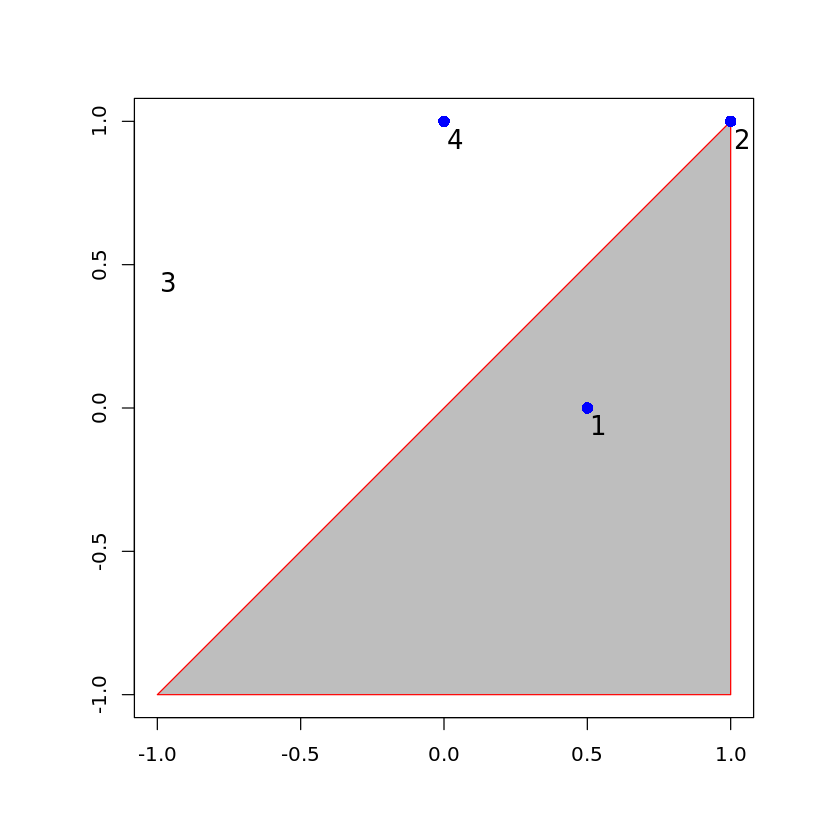

In [22]:
par(pty = "s")
plot(a, border = "red", col = "gray", axes = TRUE)
plot(p[sel[,1]], add = TRUE, lab = 1:4, pch = 1)
plot(p[sel[,1]], add = TRUE, pch = 16, col = "blue", bg = "blue", cex = 1.3)
text(p_matrix[, 1] + 0.04, p_matrix[, 2] - 0.06, 1:4, cex = 1.3)

### Vector spatial data operations: spatial join

Spatial data joining relies on shared areas of geographic space (*spatial overlay*).
Joining adds a new column to the target object (`x`), from a source object (`y`).

The following code chunk determines which countries a set of random points are in:

In [23]:
set.seed(2018) # set seed for reproducibility
bb_world = st_bbox(world) # the world's bounds
random_df = data.frame(
  x = runif(n = 10, min = bb_world[1], max = bb_world[3]),
  y = runif(n = 10, min = bb_world[2], max = bb_world[4])
)
random_points <- st_as_sf(random_df, coords = c("x","y")) # convert to sf object
st_crs(random_points) <- 4326  # set geographic CRS

world_random = world[random_points, ]
random_joined = st_join(random_points, world["name_long"])

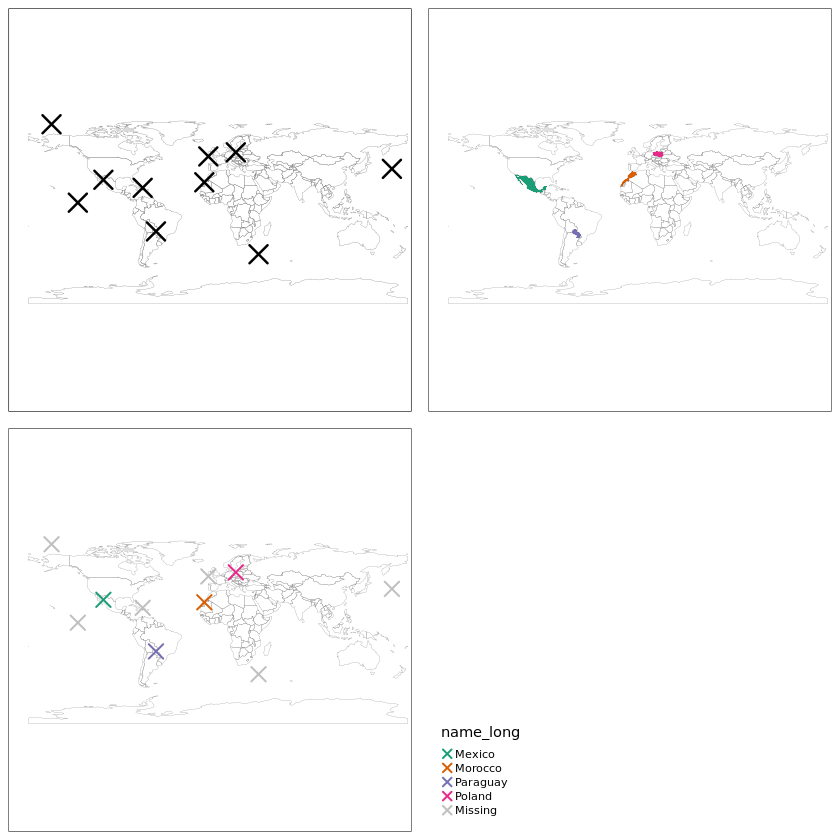

In [24]:
if(!exists("random_joined")) {
  set.seed(2018)
  bb_world = st_bbox(world)
  random_df = tibble::tibble(
    x = runif(n = 10, min = bb_world[1], max = bb_world[3]),
    y = runif(n = 10, min = bb_world[2], max = bb_world[4])
  )
  random_points = st_as_sf(random_df, coords = c("x", "y")) %>% 
    st_set_crs(4326)
  
  world_random = world[random_points, ]
  random_joined = st_join(random_points, world["name_long"])
  
}

random_joined$name_long = as.character(random_joined$name_long)

jm0 = tm_shape(world) + tm_borders(lwd = 0.2) + tm_format("World")

jm1 = jm0 +
  tm_shape(shp = random_points, bbox = bb_world) +
  tm_symbols(col = "black", shape = 4, border.lwd = 2) +
  tm_layout(scale = 1, legend.bg.color = "white", legend.bg.alpha = 0.3, legend.position = c("right", "bottom"))

jm2 = jm0 +
  tm_shape(world_random, bbox = bb_world) +
  tm_fill(col = "name_long", palette = "Dark2") +
  tm_layout(legend.show = FALSE)

jm3 = jm0 +
  tm_shape(shp = random_joined, bbox = bb_world) +
  tm_symbols(col = "name_long", shape = 4, border.lwd = 2, palette = "Dark2") +
  tm_layout(legend.show = FALSE)

jm4 = jm0 +
  tm_shape(shp = random_joined, bbox = bb_world) +
  tm_symbols(col = "name_long", shape = 4, border.lwd = 2, palette = "Dark2") +
  tm_layout(legend.only = TRUE)

tmap_arrange(jm1, jm2, jm3, jm4, nrow = 2)

### Vector spatial data operations: spatial aggregation

Similar to aggregation by attribute, but instead use the geometry of the source to 
define how values in the target object are grouped

The following code chunk calculates the average height of high points in each New Zealand region:

In [25]:
nz_avheight = aggregate(x = nz_height, by = nz, FUN = mean)

Warning message:
“Values have found that are higher than the highest break”
Warning message:
“Values have found that are higher than the highest break”


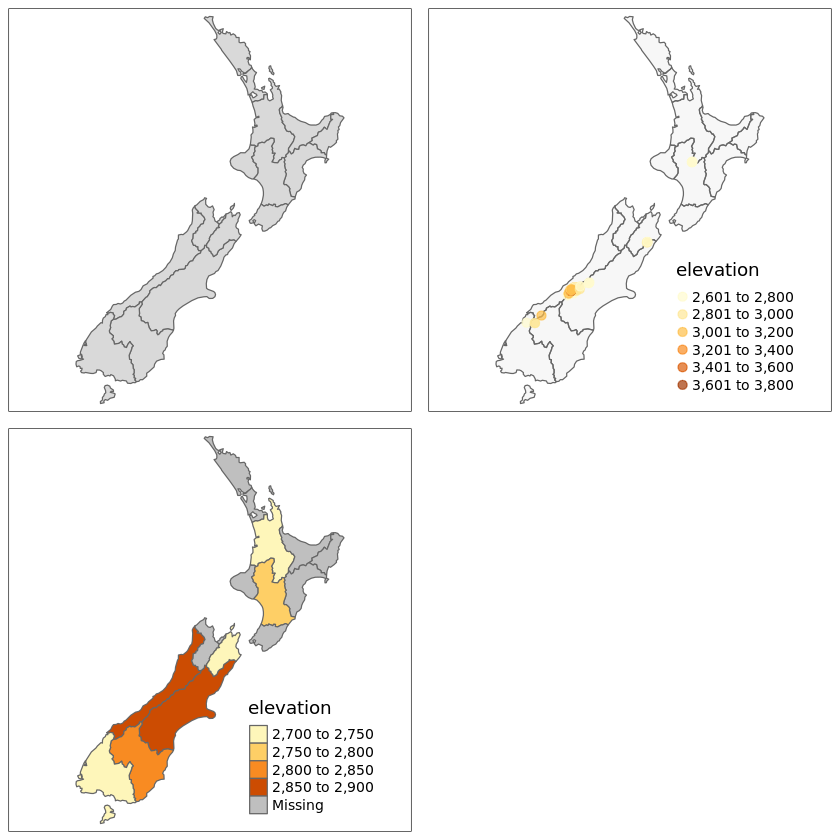

In [26]:
p1 <- tm_shape(nz) +
  tm_polygons()

p2 <- tm_shape(nz) + 
  tm_polygons(alpha = 0.2) +
  tm_shape(nz_height) + 
  tm_dots(col = "elevation", size = 0.25, n = 5, alpha = 0.7)

p3 <- tm_shape(nz_avheight) +
  tm_fill("elevation", breaks = seq(27, 29, by = 0.5) * 1e2) +
  tm_borders()
tmap_arrange(p1, p2, p3)

<a id="Ex2"></a>
### **<span style='color:Green'> Exercise 2: Spatial Data Operations</span>**   

Data Source(s): 
- Groundwater Provinces shapefile found at `.data/gw_prov/gw_provinces_extra.shp`
- Minnesota rivers shapefile found at `.data/stream_routes/mn_rivers.shp`
- Soil temp stations shapefile found at `.data/soil_temp/soil_temp.shp`

1. Find and plot all the rivers found in groundwater province 5

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#read-in shapefiles
library(sf)
gw_prov <- st_read("./data/MN/gw_prov")
mn_river <- st_read("./data/MN/stream_routes")
soil_samp <- st_read("./data/MN/soil_samp")

#extract province 5 polygon(s)
prov5 <- gw_prov[gw_prov$PROVINCE == "5", ]

#subset rivers in province 5
prov5_river <- mn_river[prov5, ]

#plot to verify
tm_shape(gw_prov) +
  tm_borders() +
  tm_shape(prov5) +
  tm_polygons() + 
  tm_shape(prov5_river) +
  tm_lines("blue")
```
----
          
</details>

2. Which groundwater province does the Lamberton (soil sample) MDA weather station sit in?

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#extract Lamberton point
mda_lamb <- soil_samp[soil_samp$name == "Lamberton", ]

#subset to province with lamberton in it
gw_prov_stns <- gw_prov[mda_lamb, ]

#plot to verify
tm_shape(gw_prov) + 
  tm_borders() + 
  tm_shape(gw_prov_stns) + 
  tm_polygons() + 
  tm_shape(mda_lamb) + 
  tm_dots("blue", size = 0.1)

#name of station
gw_prov_stns$PROVINCE
```
----
          
</details>

3. Find all the weather stations (soil sample sites) that are within 10 km of the Mississippi river.

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#extract Mississippi River line
miss <- mn_river[mn_river$KITTLE_NAM == "Mississippi River", ]

#find soil_samp points within 10000 meter distance of miss object
#subset to only these points
miss_stns <- soil_samp[st_is_within_distance(soil_samp, miss, dist = 10000, sparse = FALSE),]

#plot to verify
tm_shape(gw_prov) + 
  tm_borders() + 
  tm_shape(miss) + 
  tm_lines("red") + 
  tm_shape(miss_stns) + 
  tm_dots("blue", size = 0.1)
```
----
          
</details>

<a id="Geometry"></a>
## **Geometry Operations**

Modifying geographic objects based on their geometry

- centroids
- buffer
- clipping
- geometry unions

### Vector geometry operations: centroids

Centroid operations identify the center of geographic objects.

The most commonly used centroid operation is the *geographic centroid*, which represents the center of mass in a spatial object (think of balancing a plate on your finger)

The following code chunk calculates the centroid of the New Zealand regions and Seine tributaries

In [27]:
nz_centroid = st_centroid(nz)
seine_centroid = st_centroid(seine)

Warning message in st_centroid.sf(nz):
“st_centroid assumes attributes are constant over geometries of x”
Warning message in st_centroid.sf(seine):
“st_centroid assumes attributes are constant over geometries of x”


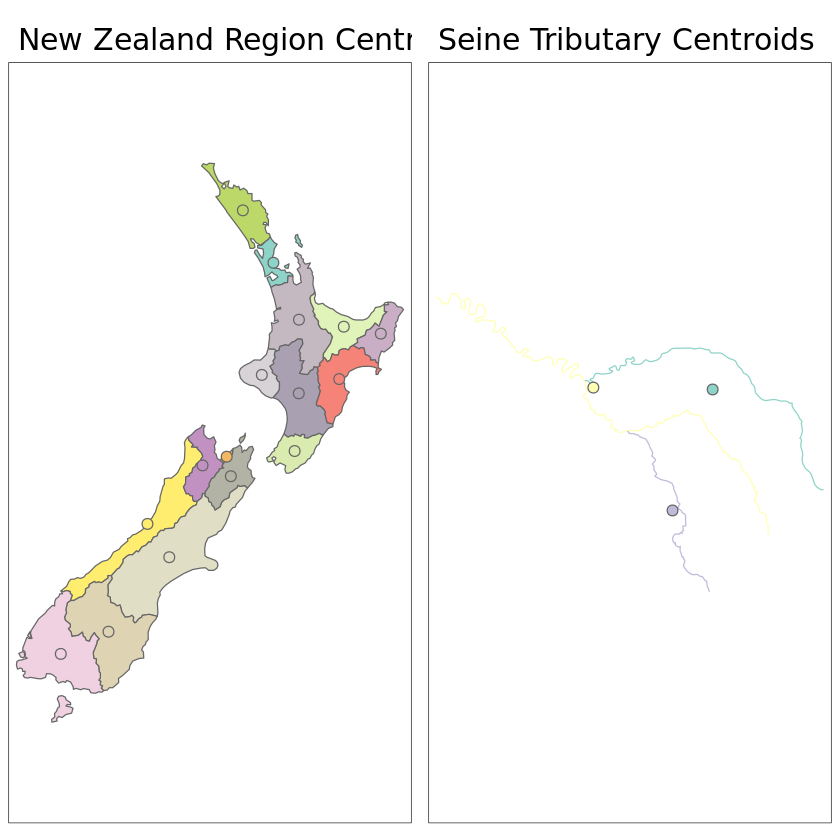

In [28]:
p_nz_cent = tm_shape(nz) + tm_polygons("Name") + 
  tm_shape(nz_centroid) + tm_bubbles("Name", size = 0.2) +
  tm_layout(main.title = "New Zealand Region Centroids", legend.show = FALSE)
p_seine_cent = tm_shape(seine) + tm_lines("name") +
  tm_shape(seine_centroid) + tm_bubbles("name", size = 0.2) +
  tm_layout(main.title = "Seine Tributary Centroids", legend.show = FALSE)
tmap_arrange(p_nz_cent, p_seine_cent, ncol = 2)

### Vector geometry operations: buffer

Buffers are polygons representing the area within a given distance of a geometric feature:
regardless of whether the input is a point, line or polygon, the output is a polygon.

The following chunk calculates buffers around the New Zealand regions and Seine tributaries

In [29]:
nz_buff = st_buffer(nz, dist = 50000)
seine_buff = st_buffer(seine, dist = 5000)

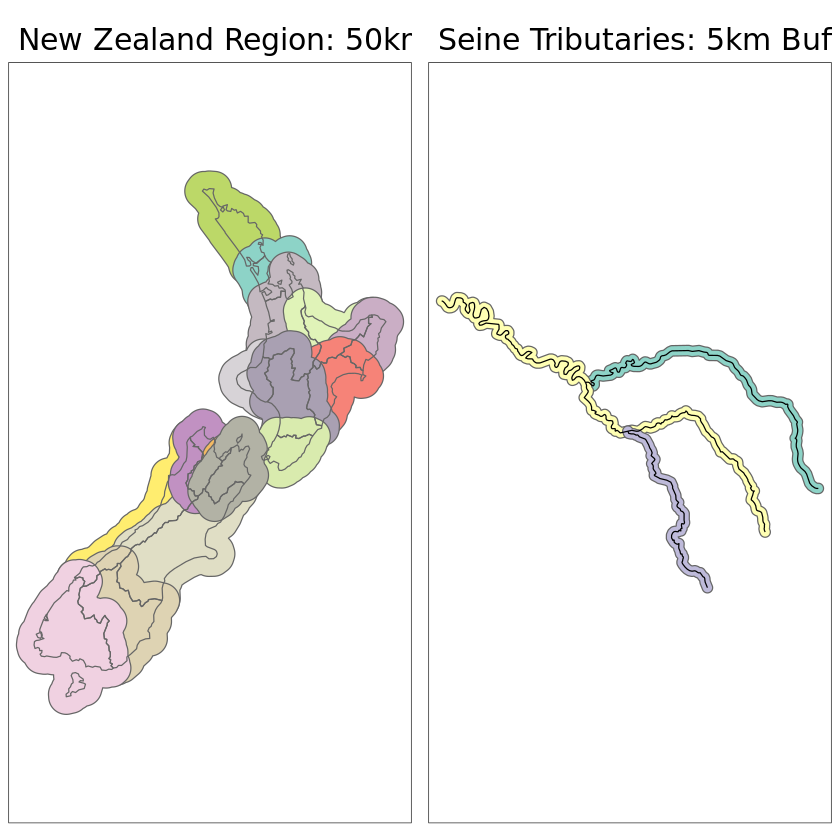

In [30]:
p_buffs1 = tm_shape(nz_buff) + tm_polygons(col = "Name") +
  tm_shape(nz) + tm_borders() +
  tm_layout(main.title = "New Zealand Region: 50km Buffer", legend.show = FALSE)
p_buffs2 = tm_shape(seine_buff) + tm_polygons(col = "name") +
  tm_shape(seine) + tm_lines() +
  tm_layout(main.title = "Seine Tributaries: 5km Buffer", legend.show = FALSE)
tmap_arrange(p_buffs1, p_buffs2, ncol = 2)

### Vector geometry operations: clipping

Spatial clipping involves changes to the geometry columns of at least some of the affected features

The following figure demonstrates how this works for all combinations of the 'Venn' diagram representing object `x` and object `y`.

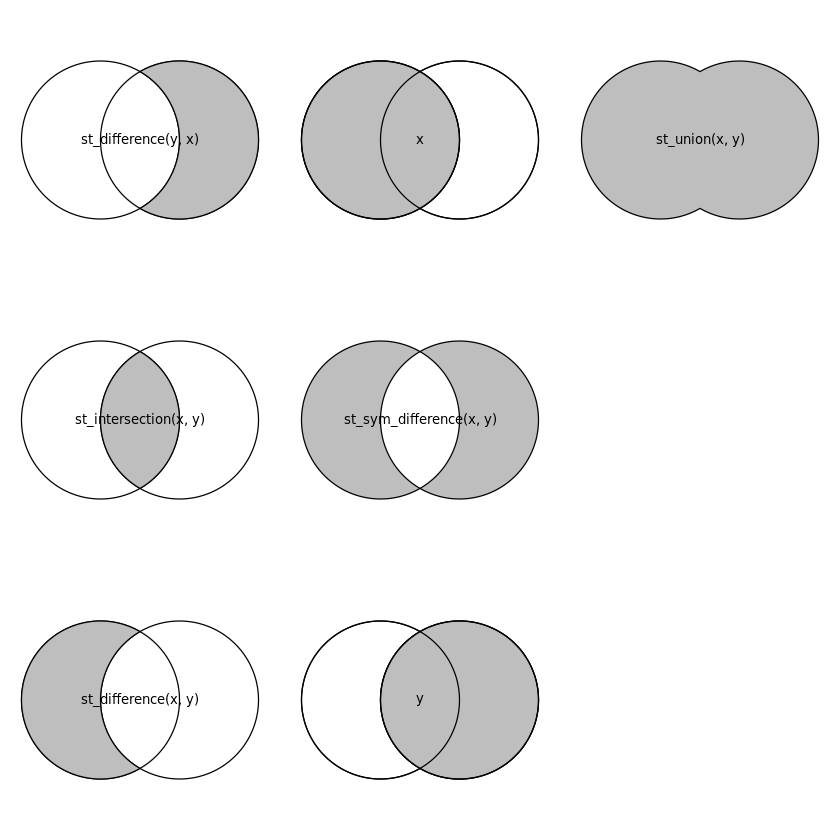

In [31]:
if(!exists("b")) {
  b = st_sfc(st_point(c(0, 1)), st_point(c(1, 1))) # create 2 points
  b = st_buffer(b, dist = 1) # convert points to circles
  l = c("x", "y")
  x = b[1]
  y = b[2]
  x_and_y = st_intersection(x, y)
}

old_par = par(mfrow = c(3, 3), mai = c(0.1, 0.1, 0.1, 0.1))
plot(b)
y_not_x = st_difference(y, x)
plot(y_not_x, col = "grey", add = TRUE)
text(x = 0.5, y = 1, "st_difference(y, x)")
plot(b)
plot(x, add = TRUE, col = "grey")
text(x = 0.5, y = 1, "x")
plot(b, add = TRUE)
x_or_y = st_union(x, y)
plot(x_or_y, col = "grey")
text(x = 0.5, y = 1, "st_union(x, y)")
x_and_y = st_intersection(x, y)
plot(b)
plot(x_and_y, col = "grey", add = TRUE) 
text(x = 0.5, y = 1, "st_intersection(x, y)")
# x_xor_y = st_difference(x_xor_y, x_and_y) # failing
x_not_y = st_difference(x, y)
x_xor_y = st_sym_difference(x, y)
plot(x_xor_y, col = "grey")
text(x = 0.5, y = 1, "st_sym_difference(x, y)")
plot.new()
plot(b)
plot(x_not_y, col = "grey", add = TRUE)
text(x = 0.5, y = 1, "st_difference(x, y)")
plot(b)
plot(y, col = "grey", add = TRUE)
plot(b, add = TRUE)
text(x = 0.5, y = 1, "y")
par(old_par)

### Vector geometry operations: unions

Spatial unions silently dissolve the geometries of touching polygons in the same group

Remember our aggregation of the number of people per continent based on country-level data:

In [32]:
world_agg = aggregate(world["pop"], by = list(world$continent),
                       FUN = sum, na.rm = TRUE)

Warning message:
“The shape world_agg is invalid. See sf::st_is_valid”


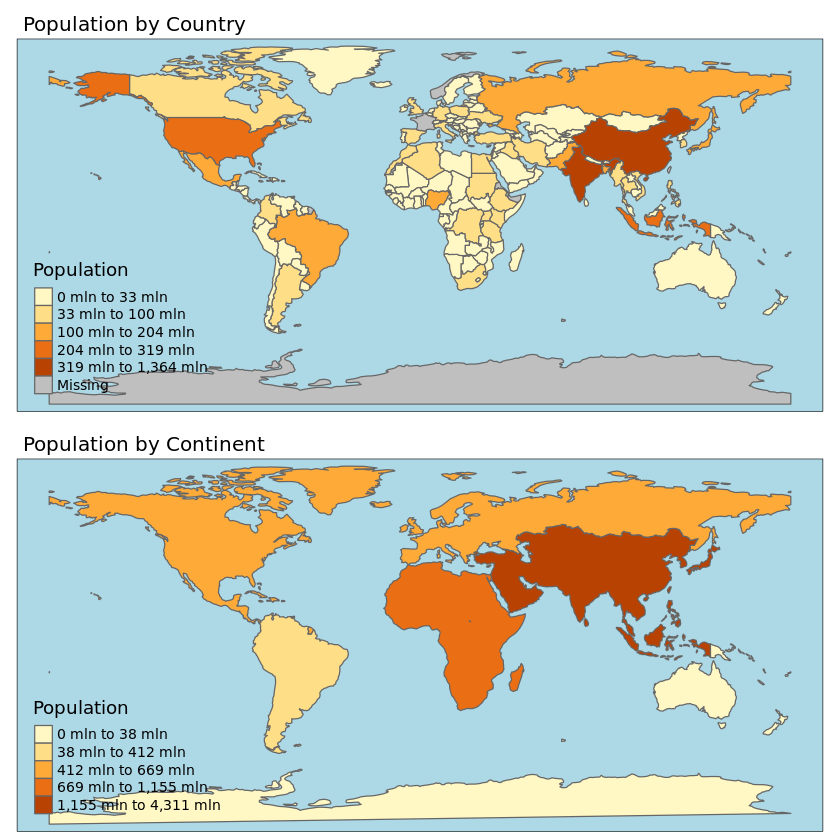

In [33]:
p_pop1 = tm_shape(world) + tm_polygons(col = "pop", title = "Population", style = "jenks") +
  tm_layout(main.title = "Population by Country", main.title.size = 1,
            bg.color = "lightblue")
p_pop2 = tm_shape(world_agg) + tm_polygons(col = "pop", title = "Population", style = "jenks") +
  tm_layout(main.title = "Population by Continent", main.title.size = 1,
            bg.color = "lightblue")
tmap_arrange(p_pop1, p_pop2, ncol = 1)

<a id="Ex3"></a>
### **<span style='color:Green'> Exercise 3: Geometry Data Operations</span>**   

Data Source(s): 
- Groundwater Provinces shapefile found at `.data/gw_prov/gw_provinces_extra.shp`
- Minnesota rivers shapefile found at `.data/stream_routes/mn_rivers.shp`

1. Find the centroid of the Mississippi River

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#read-in shapefiles
library(sf)
gw_prov <- st_read("./data/MN/gw_prov")
mn_river <- st_read("./data/MN/stream_routes")

#extract Mississippi River
miss <- mn_river[mn_river$KITTLE_NAM == "Mississippi River", ]

#calculate centroid
miss_centroid <- st_centroid(miss)

#plot to verify
tm_shape(miss) + 
  tm_lines("blue") + 
  tm_shape(miss_centroid) +
  tm_dots("red", size = 0.1)
```
----
          
</details>

2. Create a 10km buffer around the Mississippi River

ERROR: Error in st_buffer(miss, dist = 10000): object 'miss' not found


<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#create buffer at 10000 meters
miss_buff <- st_buffer(miss, dist = 10000)

#plot to verify
tm_shape(miss_buff) +
  tm_polygons() + 
  tm_shape(miss) + 
  tm_lines("blue")
```
----
          
</details>

3. Find and plot the segments of the Mississippi river that run through groundwater province 5

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```r
#find the intersections between province boundaries and mississippi line
miss_prov <- st_intersection(gw_prov, miss)

#extract province 1 polygon(s)
miss_prov1 <- miss_prov[miss_prov$PROVINCE == "1", ]

#plot to verify
tm_shape(gw_prov) + 
  tm_borders() + 
  tm_shape(miss_prov1) + 
  tm_lines("blue")
```
----
          
</details>